In [1]:
# %%pycodestyle
import pandas as pd
import numpy as np
import re
%load_ext pycodestyle_magic
# Load package to confirm the code is PEP-8 formmat
# pip install pycodestyle
# pip install pycodestyle_magic
# Load libraries
# Checking
# pd
# np

In [2]:
# %%pycodestyle
# Set display to see data.
pd.set_option('display.width', 4000)
pd.set_option('max_colwidth', 4000)
pd.set_option('max_rows', 100)
pd.set_option('max_columns', 200)

In [3]:
#%%pycodestyle
# Load dataframe
df = pd.read_csv("./DOT_teste_data_science.csv", encoding='ISO-8859-1')

In [4]:
# %%pycodestyle
# Change Column names
df.columns = ['Id', 'PlaceTest', 'DateTest',
              'Rate', 'TextRate', 'HourTest',
              'Sex', 'MaritalStatus', 'Education',
              'Hometown', 'Neighborhood']

# Create new dataframe with the changes and preserve the original
# Drop ID column
# df2 = df.drop(['Id'], axis=1)
df2 = df

# Show new dataframe
df2.head()

,Id,PlaceTest,DateTest,Rate,TextRate,HourTest,Sex,MaritalStatus,Education,Hometown,Neighborhood
0,0,GO - Goiás,13/01/2017,"7,45","2,2",manhã,Masculino,Casado(a),Ensino médio,fortaleza,Asa Sul
1,1,GO - Goiás,10/01/2017,"7,4","2,4",manhã,Masculino,Casado(a),Especialização,Recife,Norte (Águas Claras)
2,2,GO - Goiás,07/01/2017,"7,3","1,8",manhã,Masculino,Casado(a),Superior,BRASILIA,Setor Sudoeste
3,3,GO - Goiás,02/01/2017,"7,2","1,7",Noite,Masculino,Solteiro(a),Ensino médio,Brasília,Setor Norte
4,4,GO - Goiás,09/01/2017,"6,95","1,7",manhã,Feminino,Solteiro(a),Superior,BRASÍLIA,Guará I


In [5]:
# %%pycodestyle
# Check if there is all values.
df2.isnull().values.any()

True

In [6]:
# %%pycodestyle
# Unique Counts


def isNaN(df):
    for i in df.columns:
        count = df[i].isnull().values.any()
        print(i, ": ", count)


# Check all columns, True = There is NaN, False = There is no Nan.
print(isNaN(df2))

Id :  False
PlaceTest :  False
DateTest :  True
Rate :  False
TextRate :  False
HourTest :  True
Sex :  True
MaritalStatus :  True
Education :  True
Hometown :  True
Neighborhood :  True
None


In [7]:
# %%pycodestyle
print('dtypes: ')
df2.dtypes

dtypes: 


Id                int64
PlaceTest        object
DateTest         object
Rate             object
TextRate         object
HourTest         object
Sex              object
MaritalStatus    object
Education        object
Hometown         object
Neighborhood     object
dtype: object

In [8]:
# %%pycodestyle
# Change comma to point.
df2.Rate.replace(",", ".", regex=True, inplace=True)
df2.TextRate.replace(",", ".", regex=True, inplace=True)
# Transform Rate and TextRate to float.
df2[["Rate", "TextRate"]] = df2[["Rate", "TextRate"]].apply(pd.to_numeric)

In [9]:
# %%pycodestyle
# Create new column to identify if this student has been approved, or not.
conditions = [(df2['Rate'] >= 5.0) & (df2['TextRate'] > 0.0)]
choices = [1]

df2['Approved'] = np.select(conditions, choices, default=0)


In [10]:
# %%pycodestyle
# Create new column to with All Rate.
df2['AllRate'] = df2['Rate'] + df2['TextRate']


In [11]:
# %%pycodestyle
# Create new column to identify who doesn't got the rate above 0.
conditions = [(df2['TextRate'] > 0.0)]
choices = [1]

df2['HasTextRate'] = np.select(conditions, choices, default=0)


In [12]:
df2.head()

,Id,PlaceTest,DateTest,Rate,TextRate,HourTest,Sex,MaritalStatus,Education,Hometown,Neighborhood,Approved,AllRate,HasTextRate
0,0,GO - Goiás,13/01/2017,7.45,2.2,manhã,Masculino,Casado(a),Ensino médio,fortaleza,Asa Sul,1,9.65,1
1,1,GO - Goiás,10/01/2017,7.40,2.4,manhã,Masculino,Casado(a),Especialização,Recife,Norte (Águas Claras),1,9.80,1
2,2,GO - Goiás,07/01/2017,7.30,1.8,manhã,Masculino,Casado(a),Superior,BRASILIA,Setor Sudoeste,1,9.10,1
3,3,GO - Goiás,02/01/2017,7.20,1.7,Noite,Masculino,Solteiro(a),Ensino médio,Brasília,Setor Norte,1,8.90,1
4,4,GO - Goiás,09/01/2017,6.95,1.7,manhã,Feminino,Solteiro(a),Superior,BRASÍLIA,Guará I,1,8.65,1


In [13]:
# %%pycodestyle
print('dtypes: ')
df2.dtypes

dtypes: 


Id                 int64
PlaceTest         object
DateTest          object
Rate             float64
TextRate         float64
HourTest          object
Sex               object
MaritalStatus     object
Education         object
Hometown          object
Neighborhood      object
Approved           int64
AllRate          float64
HasTextRate        int64
dtype: object

In [14]:
# %%pycodestyle
print('Decribe: ')
df2.describe()

Decribe: 


,Id,Rate,TextRate,Approved,AllRate,HasTextRate
count,12100.000000,12100.000000,12100.000000,12100.000000,12100.000000,12100.000000
mean,6049.500000,4.577988,0.874373,0.481570,5.452361,0.532314
std,3493.113463,1.704218,0.855287,0.499681,2.510222,0.498975
min,0.000000,0.750000,0.000000,0.000000,0.750000,0.000000
25%,3024.750000,3.000000,0.000000,0.000000,3.000000,0.000000
50%,6049.500000,4.850000,1.100000,0.000000,6.150000,1.000000
75%,9074.250000,5.950000,1.700000,1.000000,7.600000,1.000000
max,12099.000000,10.000000,2.500000,1.000000,12.500000,1.000000


In [15]:
# %%pycodestyle
print('Info: ')
df2.info()

Info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12100 entries, 0 to 12099
Data columns (total 14 columns):
Id               12100 non-null int64
PlaceTest        12100 non-null object
DateTest         12060 non-null object
Rate             12100 non-null float64
TextRate         12100 non-null float64
HourTest         12060 non-null object
Sex              12060 non-null object
MaritalStatus    12060 non-null object
Education        12060 non-null object
Hometown         12060 non-null object
Neighborhood     12060 non-null object
Approved         12100 non-null int64
AllRate          12100 non-null float64
HasTextRate      12100 non-null int64
dtypes: float64(3), int64(3), object(8)
memory usage: 1.3+ MB


In [16]:
# %%pycodestyle
# Unique Counts


def unique_counts(df):
    for i in df.columns:
        count = df[i].nunique()
        print(i, ": ", count)


print(unique_counts(df2))

Id :  12100
PlaceTest :  21
DateTest :  34
Rate :  123
TextRate :  26
HourTest :  2
Sex :  2
MaritalStatus :  6
Education :  10
Hometown :  4602
Neighborhood :  4426
Approved :  2
AllRate :  161
HasTextRate :  2
None


In [17]:
# %%pycodestyle
print('Sex: ', df.Sex.unique())
print('HourTest: ', df.HourTest.unique())
print('MaritalStatus: ', df.MaritalStatus.unique())
print('Education: ', df.Education.unique())
print('PlaceTest: ', df.PlaceTest.unique())

Sex:  ['Masculino' 'Feminino' nan]
HourTest:  ['manhã' 'Noite' nan]
MaritalStatus:  ['Casado(a)' 'Solteiro(a)' 'Divorciado(a)' 'Separado(a)' 'Viúvo(a)' nan
 '0']
Education:  ['Ensino médio' 'Especialização' 'Superior' 'Superior incompleto'
 'Mestrado' 'MBA' 'Nível técnico' 'Ensino fundamental' nan 'Doutorado'
 'Não informado']
PlaceTest:  ['GO - Goiás' 'MG - Minas Gerais' 'MS - Mato Grosso do Sul' 'PA - Pará'
 'PB - Paraíba' 'RJ - Rio de Janeiro' 'SC - Santa Catarina' 'SE - Sergipe'
 'CE - Ceará' 'PI - Piauí' 'RN - Rio Grande do Norte' 'BA - Bahia'
 'RS - Rio Grande do Sul' 'RO - Rondônia' 'MT - Mato Grosso'
 'PE - Pernambuco' 'RR - Roraima' 'MA - Maranhão' 'ES - Espírito Santo'
 'TO - Tocantins' 'AM - Amazonas']


In [18]:
# %%pycodestyle
# Change Sex from text to integer: 0 - NaN, 1-Male, 2-Female.
conditions = [(df2['Sex'] == 'Masculino'),
              (df2['Sex'] == 'Feminino')]
choices = [1, 2]

df2['Sex'] = np.select(conditions, choices, default=0)

In [19]:
df2.groupby('Sex').apply(lambda df2: df2.sample(1))

,,Id,PlaceTest,DateTest,Rate,TextRate,HourTest,Sex,MaritalStatus,Education,Hometown,Neighborhood,Approved,AllRate,HasTextRate
Sex,,,,,,,,,,,,,,,
0,6287,6287,MA - Maranhão,NaN,3.00,0.0,NaN,0,NaN,NaN,NaN,NaN,0,3.00,0
1,9557,9557,AM - Amazonas,07/08/2016,5.25,1.0,Noite,1,Solteiro(a),Ensino médio,BARCELOS- AM,COLôNIA TERRA NOVA,1,6.25,1
2,4678,4678,RS - Rio Grande do Sul,15/01/2017,2.75,0.0,Noite,2,Solteiro(a),Ensino médio,Tupanciretã,Centro,0,2.75,0


In [20]:
# %%pycodestyle
# Change HourTest from text to integer: 0 - NaN, 1-Morning, 2-Evening
conditions = [(df2['HourTest'] == 'manhã'),
              (df2['HourTest'] == 'Noite')]
choices = [1, 2]

df2['HourTest'] = np.select(conditions, choices, default=0)

In [21]:
df2.groupby('HourTest').apply(lambda df2: df2.sample(1))

,,Id,PlaceTest,DateTest,Rate,TextRate,HourTest,Sex,MaritalStatus,Education,Hometown,Neighborhood,Approved,AllRate,HasTextRate
HourTest,,,,,,,,,,,,,,,
0,3094,3094,PA - Pará,NaN,2.25,0.0,0,0,NaN,NaN,NaN,NaN,0,2.25,0
1,3779,3779,GO - Goiás,17/01/2017,1.75,0.0,1,2,Casado(a),Ensino médio,itumbiara,ferreira da costa,0,1.75,0
2,4757,4757,PA - Pará,08/01/2017,2.75,0.0,2,2,Solteiro(a),Superior,BELÉM,Angelim,0,2.75,0


In [22]:
# %%pycodestyle
# Change MaritalStatus from text to integer: 0 - NaN or 0,
# 1-Married, 2-Divorced, 3-Separated, 4-Single, 5-Widow
conditions = [(df2['MaritalStatus'] == 'Casado(a)'),
              (df2['MaritalStatus'] == 'Divorciado(a)'),
              (df2['MaritalStatus'] == 'Separado(a)'),
              (df2['MaritalStatus'] == 'Solteiro(a)'),
              (df2['MaritalStatus'] == 'Viúvo(a)')]
choices = [1, 2, 3, 4, 5]

df2['MaritalStatus'] = np.select(conditions, choices, default=0)

In [23]:
df2.groupby('MaritalStatus').apply(lambda df2: df2.sample(1))

,,Id,PlaceTest,DateTest,Rate,TextRate,HourTest,Sex,MaritalStatus,Education,Hometown,Neighborhood,Approved,AllRate,HasTextRate
MaritalStatus,,,,,,,,,,,,,,,
0,2070,2070,GO - Goiás,NaN,6.55,2.3,0,0,0,NaN,NaN,NaN,1,8.85,1
1,9625,9625,BA - Bahia,13/08/2016,7.40,1.9,2,1,1,Ensino médio,Campo formoso,Centro,1,9.30,1
2,5182,5182,RO - Rondônia,15/01/2017,3.25,0.0,2,2,2,Ensino médio,COLORADO DO OESTE,Centro,0,3.25,0
3,4137,4137,PI - Piauí,05/01/2017,4.90,1.4,1,1,3,Ensino médio,Rio de Janeiro,bacurizeiro,0,6.30,1
4,5100,5100,PB - Paraíba,15/01/2017,3.00,0.0,1,2,4,Ensino médio,LIVRAMENTO,SANTO ANTONIO,0,3.00,0
5,9912,9912,RS - Rio Grande do Sul,07/08/2016,8.30,2.3,2,1,5,Superior,SANTA BÁRBARA DO SUL,97170,1,10.60,1


In [24]:
# %%pycodestyle
# Change Education from text to integer: 0 - NaN or 0,
# 1-Married, 2-Divorced, 3-Separated, 4-Single, 5-Widow
conditions = [(df2['Education'] == 'Doutorado'),
              (df2['Education'] == 'Ensino fundamental'),
              (df2['Education'] == 'Ensino médio'),
              (df2['Education'] == 'Especialização'),
              (df2['Education'] == 'MBA'),
              (df2['Education'] == 'Mestrado'),
              (df2['Education'] == 'Nível técnico'),
              (df2['Education'] == 'Superior'),
              (df2['Education'] == 'Superior incompleto')]
choices = [1, 2, 3, 4, 5, 6, 7, 8, 9]

df2['Education'] = np.select(conditions, choices, default=0)

In [25]:
df2.groupby('Education').apply(lambda df2: df2.sample(1))

,,Id,PlaceTest,DateTest,Rate,TextRate,HourTest,Sex,MaritalStatus,Education,Hometown,Neighborhood,Approved,AllRate,HasTextRate
Education,,,,,,,,,,,,,,,
0,4430,4430,BA - Bahia,NaN,3.50,0.0,0,0,0,0,NaN,NaN,0,3.50,0
1,1109,1109,BA - Bahia,17/01/2017,7.75,1.5,1,2,2,1,Salvador,Centro,1,9.25,1
2,11497,11497,RR - Roraima,05/08/2016,2.00,0.0,2,2,4,2,BOA VISTA,Centro,0,2.00,0
3,4624,4624,BA - Bahia,15/01/2017,2.00,0.0,2,2,4,3,irece,Centro,0,2.00,0
4,9257,9257,TO - Tocantins,13/08/2016,7.60,2.1,2,2,4,4,Aliança do Tocantins,Setor Central,1,9.70,1
5,102,102,MG - Minas Gerais,16/01/2017,5.75,1.5,1,1,1,5,BELO HORIZONTE,Fazenda Laginha,1,7.25,1
6,1456,1456,RJ - Rio de Janeiro,14/01/2017,5.60,1.6,2,2,1,6,Paracambi,Centro,1,7.20,1
7,1987,1987,RJ - Rio de Janeiro,16/01/2017,5.75,1.5,2,1,1,7,Cataguases,Conselheiro Josino,1,7.25,1
8,7795,7795,SC - Santa Catarina,09/08/2016,6.40,1.9,1,1,1,8,SAO JOAQUIM,JARDIM BANDEIRA,1,8.30,1


In [26]:
# %%pycodestyle
# Change Placetest from text to integer: 0 - NaN,
# 1-MG - Minas Gerais
# 2-MS - Mato Grosso do Sul
# 3-PA - Pará
# 4-PB - Paraíba
# 5-RJ - Rio de Janeiro
# 6-SC - Santa Catarina
# 7-SE - Sergipe
# 8-CE - Ceará
# 9-PI - Piauí
# 10-RN - Rio Grande do Norte
# 11-BA - Bahia
# 12-RS - Rio Grande do Sul
# 13-RO - Rondônia
# 14-MT - Mato Grosso
# 15-PE - Pernambuco
# 16-RR - Roraima
# 17-MA - Maranhão
# 18-ES - Espírito Santo
# 19-TO - Tocantins
# 20-AM - Amazonas
# 21-GO - Goiás
conditions = [(df2['PlaceTest'] == 'MG - Minas Gerais'),
              (df2['PlaceTest'] == 'MS - Mato Grosso do Sul'),
              (df2['PlaceTest'] == 'PA - Pará'),
              (df2['PlaceTest'] == 'PB - Paraíba'),
              (df2['PlaceTest'] == 'RJ - Rio de Janeiro'),
              (df2['PlaceTest'] == 'SC - Santa Catarina'),
              (df2['PlaceTest'] == 'SE - Sergipe'),
              (df2['PlaceTest'] == 'CE - Ceará'),
              (df2['PlaceTest'] == 'PI - Piauí'),
              (df2['PlaceTest'] == 'RN - Rio Grande do Norte'),
              (df2['PlaceTest'] == 'BA - Bahia'),
              (df2['PlaceTest'] == 'RS - Rio Grande do Sul'),
              (df2['PlaceTest'] == 'RO - Rondônia'),
              (df2['PlaceTest'] == 'MT - Mato Grosso'),
              (df2['PlaceTest'] == 'PE - Pernambuco'),
              (df2['PlaceTest'] == 'RR - Roraima'),
              (df2['PlaceTest'] == 'MA - Maranhão'),
              (df2['PlaceTest'] == 'ES - Espírito Santo'),
              (df2['PlaceTest'] == 'TO - Tocantins'),
              (df2['PlaceTest'] == 'AM - Amazonas'),
              (df2['PlaceTest'] == 'GO - Goiás'),
              ]
choices = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
           15, 16, 17, 18, 19, 20, 21]

df2['PlaceTest'] = np.select(conditions, choices, default=0)

In [27]:
df2.groupby('PlaceTest').apply(lambda df2: df2.sample(1))

,,Id,PlaceTest,DateTest,Rate,TextRate,HourTest,Sex,MaritalStatus,Education,Hometown,Neighborhood,Approved,AllRate,HasTextRate
PlaceTest,,,,,,,,,,,,,,,
1,7085,7085,1,09/08/2016,6.65,1.9,1,2,4,8,Belo Horizonte,Centro,1,8.55,1
2,4001,4001,2,15/01/2017,2.00,0.0,2,1,4,3,Coxim,Vila bela,0,2.00,0
3,3065,3065,3,08/01/2017,2.75,0.0,1,2,4,8,santa izabel pa,bairro novo horizonte,0,2.75,0
4,8678,8678,4,04/08/2016,7.85,1.6,2,1,1,4,joão pessoa,Catolé,1,9.45,1
5,5167,5167,5,13/01/2017,2.00,0.0,2,2,4,3,Miguel Pereira,Divisa,0,2.00,0
6,6927,6927,6,16/01/2017,2.50,0.0,1,2,4,3,São MIguel do Oeste,Centro,0,2.50,0
7,3474,3474,7,17/01/2017,3.00,0.0,1,1,4,3,PINHÃO,Centro,0,3.00,0
8,6058,6058,8,10/01/2017,4.55,1.3,2,2,4,3,canindé,CONJUNTO HABITACIONAL MILTON MONTEIRO,0,5.85,1
9,4196,4196,9,15/01/2017,4.50,1.0,1,2,4,8,Campo Maior,FRIPISA,0,5.50,1


In [28]:
df2.head()

,Id,PlaceTest,DateTest,Rate,TextRate,HourTest,Sex,MaritalStatus,Education,Hometown,Neighborhood,Approved,AllRate,HasTextRate
0,0,21,13/01/2017,7.45,2.2,1,1,1,3,fortaleza,Asa Sul,1,9.65,1
1,1,21,10/01/2017,7.40,2.4,1,1,1,4,Recife,Norte (Águas Claras),1,9.80,1
2,2,21,07/01/2017,7.30,1.8,1,1,1,8,BRASILIA,Setor Sudoeste,1,9.10,1
3,3,21,02/01/2017,7.20,1.7,2,1,4,3,Brasília,Setor Norte,1,8.90,1
4,4,21,09/01/2017,6.95,1.7,1,2,4,8,BRASÍLIA,Guará I,1,8.65,1


In [29]:
df2[['Rate', 'TextRate']].describe()

,Rate,TextRate
count,12100.000000,12100.000000
mean,4.577988,0.874373
std,1.704218,0.855287
min,0.750000,0.000000
25%,3.000000,0.000000
50%,4.850000,1.100000
75%,5.950000,1.700000
max,10.000000,2.500000


In [30]:
pd.crosstab(df2['Approved'], df2['PlaceTest'])


#pd.crosstab(sample['is_booking'], sample['srch_rm_cnt'])
#sample.groupby('srch_rm_cnt')['is_booking'].mean()
#sample['srch_children_cnt'].corr(sample['is_booking'])
#sample.corr()

PlaceTest,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
Approved,,,,,,,,,,,,,,,,,,,,,
0,467,421,934,261,297,225,169,264,81,147,480,131,244,167,125,457,394,77,128,40,764
1,431,416,622,348,480,320,73,292,60,83,411,280,209,165,84,326,334,49,197,65,582


In [31]:
df2[['PlaceTest', 'DateTest', 'Rate', 'TextRate', 'HourTest', 'Sex', 'MaritalStatus', 'Education', 'Hometown', 'Neighborhood', 'Approved']].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fce752eb400>,
      dtype=object)

In [32]:
df2.groupby('Approved')['Approved']\
    .agg({'HowMany': 'count'})\

/home/oracy/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


,HowMany
Approved,
0,6273
1,5827


In [33]:
df2.assign(NotApproved=1 - df2['Approved']).groupby('PlaceTest').sum().reset_index()

,PlaceTest,Id,Rate,TextRate,HourTest,Sex,MaritalStatus,Education,Approved,AllRate,HasTextRate,NotApproved
0,1,2711864,4127.05,707.80,1326,1270,2514,4569,431,4834.85,442,467
1,2,4355763,3835.20,722.20,1372,1199,2530,4143,416,4557.40,441,421
2,3,9841463,6613.10,1109.60,2359,2367,5204,6474,622,7722.70,712,934
3,4,3227017,2995.15,620.40,861,821,1777,3035,348,3615.55,381,261
4,5,4237987,4052.96,836.71,1179,1073,2189,3992,480,4889.67,497,297
5,6,3003045,2718.55,616.30,915,755,1528,2647,320,3334.85,364,225
6,7,766885,972.25,179.50,335,335,789,1082,73,1151.75,108,169
7,8,3452928,2682.55,539.30,844,784,1783,2672,292,3221.85,321,264
8,9,440202,603.45,130.70,228,219,428,756,60,734.15,80,81
9,10,1057024,937.95,184.20,347,346,739,1084,83,1122.15,112,147


In [34]:
df_Winners = df2[df2.Approved == 1]
df_Losers = df2[df2.Approved == 0]

In [35]:
df_Winners.describe()
df_Losers.describe()

,Id,PlaceTest,Rate,TextRate,HourTest,Sex,MaritalStatus,Education,Approved,AllRate,HasTextRate
count,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000,6273.0,6273.000000,6273.000000
mean,6566.060896,9.946278,3.125410,0.126128,1.559700,1.491312,3.121951,4.299059,0.0,3.251538,0.097880
std,3263.863546,6.800886,0.784332,0.394745,0.504743,0.508188,1.344496,2.268243,0.0,1.088173,0.297176
min,39.000000,1.000000,0.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.750000,0.000000
25%,3893.000000,3.000000,2.750000,0.000000,1.000000,1.000000,1.000000,3.000000,0.0,2.750000,0.000000
50%,5608.000000,10.000000,3.000000,0.000000,2.000000,1.000000,4.000000,3.000000,0.0,3.000000,0.000000
75%,10530.000000,16.000000,3.500000,0.000000,2.000000,2.000000,4.000000,7.000000,0.0,3.500000,0.000000
max,12099.000000,21.000000,6.250000,1.700000,2.000000,2.000000,5.000000,9.000000,0.0,6.650000,1.000000


In [36]:
df_Winners.groupby(['PlaceTest']).aggregate('count').reset_index().sort_values('PlaceTest', ascending=False)

,PlaceTest,Id,DateTest,Rate,TextRate,HourTest,Sex,MaritalStatus,Education,Hometown,Neighborhood,Approved,AllRate,HasTextRate
20,21,582,577,582,582,582,582,582,582,577,577,582,582,582
19,20,65,65,65,65,65,65,65,65,65,65,65,65,65
18,19,197,197,197,197,197,197,197,197,197,197,197,197,197
17,18,49,49,49,49,49,49,49,49,49,49,49,49,49
16,17,334,333,334,334,334,334,334,334,333,333,334,334,334
15,16,326,326,326,326,326,326,326,326,326,326,326,326,326
14,15,84,84,84,84,84,84,84,84,84,84,84,84,84
13,14,165,165,165,165,165,165,165,165,165,165,165,165,165
12,13,209,209,209,209,209,209,209,209,209,209,209,209,209
11,12,280,280,280,280,280,280,280,280,280,280,280,280,280


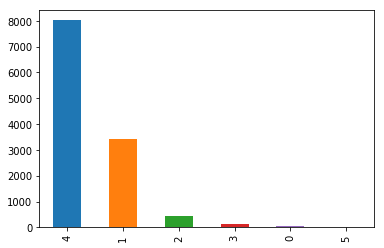

In [37]:
df2.MaritalStatus.value_counts()[:].plot(kind='bar')

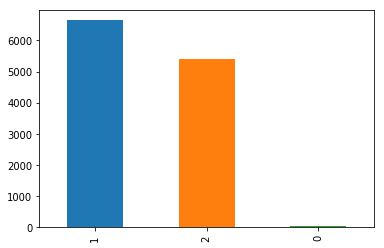

In [38]:
df2.Sex.value_counts()[:].plot(kind='bar')

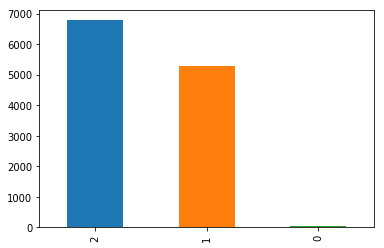

In [39]:
df2.HourTest.value_counts()[:].plot(kind='bar')

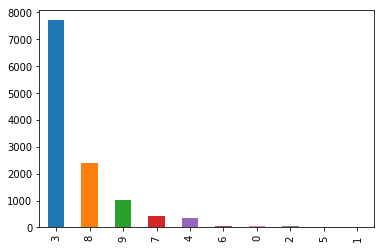

In [40]:
df2.Education.value_counts()[:].plot(kind='bar')

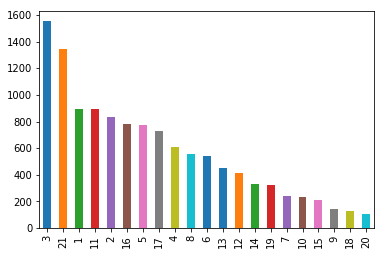

In [41]:
df2.PlaceTest.value_counts()[:].plot(kind='bar')

In [42]:
rfmTable = df_Winners.groupby('PlaceTest').agg({'Id': lambda x: x.count()})

rfmTable['Id'] = rfmTable['Id'].astype(int)
rfmTable.rename(columns={'Id': 'frequency'}, inplace=True)
rfmTable

,frequency
PlaceTest,
1,431
2,416
3,622
4,348
5,480
6,320
7,73
8,292
9,60


In [43]:
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [44]:
# %%pycodestyle
# Correlation
cols = ['PlaceTest', 'HourTest', 'Sex', 'MaritalStatus', 'Education']
print(df2[cols].corr())

               PlaceTest  HourTest       Sex  MaritalStatus  Education
PlaceTest       1.000000  0.048759  0.011931       0.009447  -0.024435
HourTest        0.048759  1.000000  0.033077       0.030032   0.012779
Sex             0.011931  0.033077  1.000000       0.122772   0.030327
MaritalStatus   0.009447  0.030032  0.122772       1.000000  -0.032322
Education      -0.024435  0.012779  0.030327      -0.032322   1.000000


In [45]:
# Atributos e Variável target
features = df2[['PlaceTest', 'HourTest','MaritalStatus', 'Education', 'AllRate']]
targetVariables = df2.Approved

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale
%matplotlib inline

In [47]:
# Obtém número de observações e número de atributos
n_observ, n_features = df2.shape

In [48]:
df

,Id,PlaceTest,DateTest,Rate,TextRate,HourTest,Sex,MaritalStatus,Education,Hometown,Neighborhood,Approved,AllRate,HasTextRate
0,0,21,13/01/2017,7.45,2.2,1,1,1,3,fortaleza,Asa Sul,1,9.65,1
1,1,21,10/01/2017,7.40,2.4,1,1,1,4,Recife,Norte (Águas Claras),1,9.80,1
2,2,21,07/01/2017,7.30,1.8,1,1,1,8,BRASILIA,Setor Sudoeste,1,9.10,1
3,3,21,02/01/2017,7.20,1.7,2,1,4,3,Brasília,Setor Norte,1,8.90,1
4,4,21,09/01/2017,6.95,1.7,1,2,4,8,BRASÍLIA,Guará I,1,8.65,1
5,5,21,10/01/2017,6.90,2.4,1,2,4,3,ANÁPOLIS,Jardim Europa,1,9.30,1
6,6,21,10/01/2017,6.90,1.9,1,1,4,3,ALEXÂNIA,SETOR NORTE,1,8.80,1
7,7,21,10/01/2017,6.75,1.5,1,2,4,8,ENTRE RIOS DE MINAS,Sul (Águas Claras),1,8.25,1
8,8,21,14/01/2017,6.45,2.2,1,1,4,8,Brasilia,Riacho Fundo II,1,8.65,1
9,9,21,05/01/2017,6.45,1.7,1,1,4,3,BRASÍLIA,Centro,1,8.15,1


In [49]:
# Aplica Escala nos dados
df3 = df2
#df3['Rate'] = scale(df3.Rate)
#df3['TextRate'] = scale(df3.TextRate)
#df3['AllRate'] = scale(df3.AllRate)

In [50]:
df.head()

,Id,PlaceTest,DateTest,Rate,TextRate,HourTest,Sex,MaritalStatus,Education,Hometown,Neighborhood,Approved,AllRate,HasTextRate
0,0,21,13/01/2017,7.45,2.2,1,1,1,3,fortaleza,Asa Sul,1,9.65,1
1,1,21,10/01/2017,7.40,2.4,1,1,1,4,Recife,Norte (Águas Claras),1,9.80,1
2,2,21,07/01/2017,7.30,1.8,1,1,1,8,BRASILIA,Setor Sudoeste,1,9.10,1
3,3,21,02/01/2017,7.20,1.7,2,1,4,3,Brasília,Setor Norte,1,8.90,1
4,4,21,09/01/2017,6.95,1.7,1,2,4,8,BRASÍLIA,Guará I,1,8.65,1


In [51]:
n_observ

12100

In [52]:
n_features

14

In [53]:
# Obtém os labels
n_digits = len(np.unique(df3.Approved))
labels = df3.Approved

In [54]:
df3 = df3.drop(columns=['Id', 'Rate', 'TextRate', 'AllRate', 'DateTest', 'Neighborhood', 'Hometown'])

In [55]:
labels
df3.head()

,PlaceTest,HourTest,Sex,MaritalStatus,Education,Approved,HasTextRate
0,21,1,1,1,3,1,1
1,21,1,1,1,4,1,1
2,21,1,1,1,8,1,1
3,21,2,1,4,3,1,1
4,21,1,2,4,8,1,1


In [56]:
# Cria o classificador
# http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
clf = RandomForestClassifier(n_estimators  = 10)

In [57]:
# Construção do modelo
clf = clf.fit(df3, labels)

In [58]:
scores = clf.score(df3,labels)

In [59]:
print(scores)

1.0


In [60]:
# Extraindo a importância
importances = clf.feature_importances_
indices = np.argsort(importances)

In [61]:
# Obtém os índices
ind=[]
for i in indices:
    ind.append(labels[i])

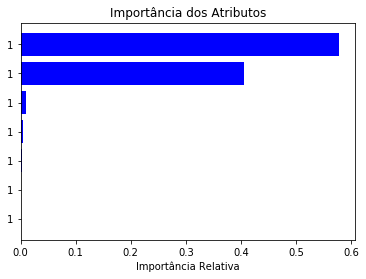

In [62]:
# Plot da Importância dos Atributos
plt.figure(1)
plt.title('Importância dos Atributos')
plt.barh(range(len(indices)), importances[indices], color = 'b', align = 'center')
plt.yticks(range(len(indices)),ind)
plt.xlabel('Importância Relativa')
plt.show()

In [63]:
#df3

In [64]:
# %%pycodestyle
# Usando um algoritmo de arvore de decisão,quais correlações foram encontradas?
# ( disponibilizar o código que vai até o banco, coleta os dados e analisa)

In [65]:
# Correlation between variables
df2.corr()

,Id,PlaceTest,Rate,TextRate,HourTest,Sex,MaritalStatus,Education,Approved,AllRate,HasTextRate
Id,1.000000,0.246557,-0.081999,-0.178437,0.005297,0.072428,0.071201,-0.172496,-0.153441,-0.116468,-0.171465
PlaceTest,0.246557,1.000000,-0.029688,-0.007552,0.048759,0.011931,0.009447,-0.024435,-0.021583,-0.022729,-0.014811
Rate,-0.081999,-0.029688,1.000000,0.914293,-0.006001,-0.132599,-0.062073,0.189652,0.884397,0.990431,0.894960
TextRate,-0.178437,-0.007552,0.914293,1.000000,0.002686,-0.091577,-0.039583,0.179295,0.907747,0.961445,0.958287
HourTest,0.005297,0.048759,-0.006001,0.002686,1.000000,0.033077,0.030032,0.012779,-0.005175,-0.003159,0.001033
Sex,0.072428,0.011931,-0.132599,-0.091577,0.033077,1.000000,0.122772,0.030327,-0.096539,-0.121226,-0.100262
MaritalStatus,0.071201,0.009447,-0.062073,-0.039583,0.030032,0.122772,1.000000,-0.032322,-0.051879,-0.055629,-0.054593
Education,-0.172496,-0.024435,0.189652,0.179295,0.012779,0.030327,-0.032322,1.000000,0.162725,0.189846,0.153026
Approved,-0.153441,-0.021583,0.884397,0.907747,-0.005175,-0.096539,-0.051879,0.162725,1.000000,0.909716,0.903396
AllRate,-0.116468,-0.022729,0.990431,0.961445,-0.003159,-0.121226,-0.055629,0.189846,0.909716,1.000000,0.934108


In [66]:
df3

,PlaceTest,HourTest,Sex,MaritalStatus,Education,Approved,HasTextRate
0,21,1,1,1,3,1,1
1,21,1,1,1,4,1,1
2,21,1,1,1,8,1,1
3,21,2,1,4,3,1,1
4,21,1,2,4,8,1,1
5,21,1,2,4,3,1,1
6,21,1,1,4,3,1,1
7,21,1,2,4,8,1,1
8,21,1,1,4,8,1,1
9,21,1,1,4,3,1,1


In [67]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from treeinterpreter import treeinterpreter as ti
from sklearn.datasets import load_iris

In [68]:
# Cria o classificador
rf = RandomForestClassifier(max_depth = 5)

In [69]:
# Obtém os índices a partir do comprimento da variável targetr
idx = list(range(len(df3.Approved)))

In [70]:
# Randomiza o ínidce
np.random.shuffle(idx)

In [71]:
df4_Array = df3.values

In [72]:
# Cria o modelo
rf.fit(df4_Array[idx][:100], df3.Approved[idx][:100].values)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [73]:
# Obtém as instâncias (exemplos ou observações) e retorna as probabilidades
instance = df4_Array[idx][100:101]
print(rf.predict_proba(instance))

[[0.1 0.9]]


In [74]:
df3.feature_names = ['PlaceTest', 'HourTest', 'Sex', 'MaritalStatus', 'Education', 'HasTextRate']

/home/oracy/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [75]:
prediction, bias, contributions = ti.predict(rf, instance)
print ("Previsões", prediction)
print ("Contribuição dos Atributos:")
for item, feature in zip(contributions[0], df3.feature_names):
    print (feature, item)

Previsões [[0.1 0.9]]
Contribuição dos Atributos:
PlaceTest [ 0.01685714 -0.01685714]
HourTest [0. 0.]
Sex [ 0.03214286 -0.03214286]
MaritalStatus [-0.00368852  0.00368852]
Education [ 0.05906044 -0.05906044]
HasTextRate [-0.29141207  0.29141207]


In [76]:
df3.Approved.values

array([1, 1, 1, ..., 0, 0, 0])

In [77]:
# Import 
import pandas
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
%matplotlib inline

In [78]:
# Imprimindo o nome das colunas
print(df2.columns)

Index(['Id', 'PlaceTest', 'DateTest', 'Rate', 'TextRate', 'HourTest', 'Sex', 'MaritalStatus', 'Education', 'Hometown', 'Neighborhood', 'Approved', 'AllRate', 'HasTextRate'], dtype='object')


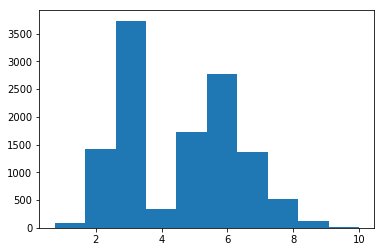

In [79]:
# Histograma com a média de avaliações
plt.hist(df2["Rate"])
plt.show()

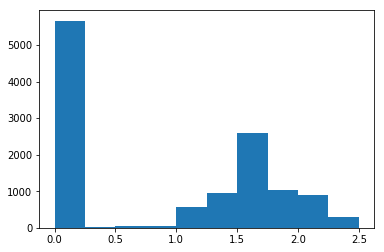

In [80]:
plt.hist(df2["TextRate"])
plt.show()

In [81]:
# Visualizando as observações com rating igual a 0
df2[df2["TextRate"] == 0]

,Id,PlaceTest,DateTest,Rate,TextRate,HourTest,Sex,MaritalStatus,Education,Hometown,Neighborhood,Approved,AllRate,HasTextRate
2306,2306,21,12/01/2017,4.50,0.0,1,2,2,3,planaltina,Setor norte,0,4.50,0
2310,2310,21,15/01/2017,4.00,0.0,1,1,1,8,Brasília,Guará I,0,4.00,0
2311,2311,21,02/01/2017,4.00,0.0,2,2,4,3,Serra Dourada,Jd. Progresso,0,4.00,0
2312,2312,21,10/01/2017,4.00,0.0,1,1,1,7,MUNDO NOVO - BA,Riacho Fundo II,0,4.00,0
2313,2313,21,12/01/2017,3.75,0.0,1,1,1,3,morros,setor leste,0,3.75,0
2314,2314,21,02/01/2017,3.75,0.0,1,1,4,3,alexânia,Centro,0,3.75,0
2315,2315,21,06/01/2017,3.50,0.0,2,2,4,3,Brasília,Asa Sul,0,3.50,0
2316,2316,21,05/01/2017,3.50,0.0,1,1,1,3,Teodoro Sampaio,Centro,0,3.50,0
2317,2317,21,02/01/2017,3.25,0.0,1,1,4,3,Alexânia,Taguatinga sul,0,3.25,0
2318,2318,21,12/01/2017,3.25,0.0,1,2,2,3,pio ix,Setor Norte,0,3.25,0


In [82]:
# Correlação
df2.corr()["TextRate"]

Id              -0.178437
PlaceTest       -0.007552
Rate             0.914293
TextRate         1.000000
HourTest         0.002686
Sex             -0.091577
MaritalStatus   -0.039583
Education        0.179295
Approved         0.907747
AllRate          0.961445
HasTextRate      0.958287
Name: TextRate, dtype: float64

In [83]:
# Obtém todas as colunas do dataframe
colunas = df2.columns.tolist()

In [84]:
# Filtra as colunas e remove as que não são relevantes
colunas = [c for c in colunas if c not in ["Id", "Approved", "AllRate", "HasTextRate", "TextRate", "Neighborhood", "Hometown", "DateTest"]]

In [85]:
# Preparando a variável target, a que será prevista
target = "TextRate"

In [86]:
# Gerando os dados de treino
df_treino = df2.sample(frac = 0.8, random_state = 101)

In [87]:
# Seleciona tudo que não está no dataset de treino e armazena no dataset de teste
df_teste = df2.loc[~df2.index.isin(df_treino.index)]

In [88]:
# Shape dos datasets
print(df_treino.shape)
print(df_teste.shape)

(9680, 14)
(2420, 14)


In [89]:
# Criando um Regressor
reg_v1 = LinearRegression()

In [90]:
# Fit the model to the training data.
modelo_v1 = reg_v1.fit(df_treino[colunas], df_treino[target])

In [91]:
modelo_v1

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [92]:
# Fazendo previsões
previsoes = modelo_v1.predict(df_teste[colunas])

In [93]:
# Computando os erros entre valores observados e valores previstos
mean_squared_error(previsoes, df_teste[target])

0.12275918193189952

In [94]:
# Criando um regressor Random Forest
reg_v2 = RandomForestRegressor(n_estimators = 100, min_samples_leaf = 10, random_state = 101)

In [95]:
# Criando o modelo
modelo_v2 = reg_v2.fit(df_treino[colunas], df_treino[target])

In [96]:
# Fazendo previsões
previsoes = modelo_v2.predict(df_teste[colunas])

In [97]:
# Computando o erro
mean_squared_error(previsoes, df_teste[target])

0.05121030687446029

In [100]:
df2.to_csv("DOT_teste_data_science_2.csv", sep='\t')

In [101]:
!ls

'Cientista de Dados Teste.ipynb'   DOT_teste_data_science.csv
 DOT_teste_data_science_2.csv
